# Hotel booking demand

# Introduction

Importing the python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
from datetime import datetime
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


Data Source
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.
Source: https://www.sciencedirect.com/science/article/pii/S2352340918315191

© All rights belong to the original data creator. This data is used here for educational and analytical purposes only.

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Data/hotel_bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Cleaning

We will check if there is any null values in the dataset

In [4]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [5]:
null_values={"country":"unkown","agent":0, "company":0, "children":0}
df=df.fillna(null_values)

We have replaced all the fields were country is NULL to Unknown.

We have replaced all the Empty agent, children, company fields to 0.

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Lets see how many columns are there

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

We will extract the day name from the reservation day

In [8]:
df['reservation_day']=pd.to_datetime(df.reservation_status_date).dt.day_name()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Thursday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Thursday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Friday


We will create a new dataframe with only categorical values and check for the corelations

We will print the top 5 positive and negative corelations

In [477]:
df1=pd.get_dummies(df[['hotel','is_canceled','arrival_date_month','deposit_type','customer_type','reservation_status','reservation_day']], dtype=int)
df1.corr().is_canceled.sort_values(ascending=False).head(5)

,is_canceled
is_canceled,1.000000
reservation_status_Canceled,0.978435
deposit_type_Non Refund,0.481457
hotel_City Hotel,0.136531
customer_type_Transient,0.133084


In [478]:
df1.corr().is_canceled.sort_values(ascending=True).head(5)

,is_canceled
reservation_status_Check-Out,-1.000000
deposit_type_No Deposit,-0.477911
reservation_day_Sunday,-0.173311
hotel_Resort Hotel,-0.136531
customer_type_Transient-Party,-0.124135


As we can see from above, reservation_status_Canceled,deposit_type_Non Refund, reservation_status_Check-Out, deposit_type_No Deposit are highly corelated.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [511]:
len(set(df.country))

178

This dataset contains hotel bookings for City Hotel and Resort Hotel, were the customers are coming from 178 countries.

# Data Transformation

In [ ]:
stays_in_week_nights=df.groupby(['stays_in_week_nights']).count().is_canceled.head(10).reset_index(name='Bookings')

In [ ]:
stays_in_week_nights['Cancellation Percentage']=df.groupby(['stays_in_week_nights'])['is_canceled'].transform('sum').head(10)/df.groupby(['stays_in_week_nights']).count().is_canceled.head(10)
stays_in_week_nights

,stays_in_week_nights,Bookings,Cancellation Percentage
0,0,7645,0.250229
1,1,30310,0.063114
2,2,33684,0.291860
3,3,22258,0.441684
4,4,9563,1.555370
5,5,11077,1.342782
6,6,1499,9.922615
7,7,1029,14.454810
8,8,656,12.964939
9,9,231,36.818182


From above we can see the number of cancellation increases graduaully when customers have more than 5 nights stay.

In [410]:
hotel_cancellation=df.groupby('hotel', observed=True).is_canceled.value_counts().unstack().reset_index()
hotel_cancellation = hotel_cancellation.melt(id_vars='hotel', var_name='cancelled', value_name='count')

In [411]:
hotel_cancellation['percentage']=hotel_cancellation['count']*100.0/hotel_cancellation.groupby('hotel', observed=True)['count'].transform('sum')
hotel_cancellation['cancelled']=hotel_cancellation['cancelled'].map({1:'Cancelled',0:'Not Cancelled'})
hotel_cancellation

,hotel,cancelled,count,percentage
0,City Hotel,Not Cancelled,46228,58.273037
1,Resort Hotel,Not Cancelled,28938,72.236645
2,City Hotel,Cancelled,33102,41.726963
3,Resort Hotel,Cancelled,11122,27.763355


Above is the table visualisation of the hotel booking cancellation of City and Resort hotel. As we can see Resort Hotel has leas cancellation with only 27.7%

In [427]:
customer_cancellation=df.groupby('customer_type', observed=True).is_canceled.value_counts().unstack().reset_index()
customer_cancellation=customer_cancellation.melt(id_vars='customer_type',var_name='is_canceled',value_name='count')

In [428]:
customer_cancellation['percentage']=round(customer_cancellation['count']*100.0/customer_cancellation.groupby('customer_type', observed=True)['count'].transform('sum'),2)
customer_cancellation['is_canceled']=customer_cancellation.is_canceled.map({0:'Not Cancelled',1:'Cancelled'})
customer_cancellation = customer_cancellation.rename(columns={'is_canceled': 'Cancelled'})
customer_cancellation

,customer_type,Cancelled,count,percentage
0,Contract,Not Cancelled,2814,69.04
1,Group,Not Cancelled,518,89.77
2,Transient,Not Cancelled,53099,59.25
3,Transient-Party,Not Cancelled,18735,74.57
4,Contract,Cancelled,1262,30.96
5,Group,Cancelled,59,10.23
6,Transient,Cancelled,36514,40.75
7,Transient-Party,Cancelled,6389,25.43


From above table visualisation, there are 4 types of customers are there, Contract, group, Transient and Transient-Party.

We can see Transient type of customer has the highest cancellation percentage of 40.7%.

In [412]:
day_canceled=df.groupby('reservation_day', observed=True).is_canceled.value_counts().unstack().reset_index().melt(id_vars='reservation_day',var_name='is_canceled',value_name='count')

In [413]:
day_canceled['percentage']=round(day_canceled['count']*100.0/day_canceled.groupby('reservation_day', observed=True)['count'].transform('sum'),2)
day_canceled['is_canceled']=day_canceled.is_canceled.map({0:'Not Cancelled',1:'Cancelled'})
day_canceled = day_canceled.rename(columns={'is_canceled': 'Cancelled'})
day_canceled

,reservation_day,Cancelled,count,percentage
0,Monday,Not Cancelled,10620,56.82
1,Tuesday,Not Cancelled,8973,53.63
2,Wednesday,Not Cancelled,9808,54.66
3,Thursday,Not Cancelled,11083,61.09
4,Friday,Not Cancelled,10991,59.50
5,Saturday,Not Cancelled,9863,76.32
6,Sunday,Not Cancelled,13828,83.87
7,Monday,Cancelled,8072,43.18
8,Tuesday,Cancelled,7758,46.37
9,Wednesday,Cancelled,8135,45.34


Above is the detailed summary of the hotel booking and cancellation of customers over different days. We can observe Sunday has the lowest cancellation percentage and Tuesday has the heighest cancellation percentage.

In [420]:
month_canceled=df.groupby('arrival_date_month', observed=True).is_canceled.value_counts().unstack().reset_index().melt(id_vars='arrival_date_month',var_name='is_canceled',value_name='count')
month_canceled.is_canceled=month_canceled.is_canceled.map({0:'Not Cancelled',1:'Cancelled'})
month_canceled = month_canceled.rename(columns={'is_canceled': 'Cancelled'})

In [460]:
month_canceled['percentage']=month_canceled['count']*100.0/month_canceled.groupby('arrival_date_month', observed=True)['count'].transform('sum')
month_canceled

,arrival_date_month,Cancelled,count,percentage
0,January,Not Cancelled,4122,69.522685
1,February,Not Cancelled,5372,66.584036
2,March,Not Cancelled,6645,67.847662
3,April,Not Cancelled,6565,59.202814
4,May,Not Cancelled,7114,60.334153
5,June,Not Cancelled,6404,58.542828
6,July,Not Cancelled,7919,62.546402
7,August,Not Cancelled,8638,62.246883
8,September,Not Cancelled,6392,60.829844
9,October,Not Cancelled,6914,61.953405


Above is the detailed summary of the hotel booking and cancellation of customers over Months. We can observe January has the lowest cancellation percentage and June has the heighest cancellation percentage.

In [436]:
year_canceled=df.groupby('arrival_date_year').is_canceled.value_counts().unstack().reset_index().melt(id_vars='arrival_date_year',var_name='is_canceled',value_name='count')
year_canceled.is_canceled=year_canceled.is_canceled.map({0:'Not Cancelled',1:'Cancelled'})
year_canceled = year_canceled.rename(columns={'is_canceled': 'Cancelled'})

In [437]:
year_canceled['percentage']=year_canceled['count']*100.0/year_canceled.groupby('arrival_date_year')['count'].transform('sum')
year_canceled

,arrival_date_year,Cancelled,count,percentage
0,2015,Not Cancelled,13854,62.984179
1,2016,Not Cancelled,36370,64.136703
2,2017,Not Cancelled,24942,61.302136
3,2015,Cancelled,8142,37.015821
4,2016,Cancelled,20337,35.863297
5,2017,Cancelled,15745,38.697864


From above we can observe, 2016 has the heighest number of booking and 2017 has the heighest percentage of cancellations.

In [438]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

In [ ]:
Resort_month_customers=df[df.hotel=='Resort Hotel'].groupby('arrival_date_month', observed=True).size().reset_index(name='customers')
City_month_customers=df[df.hotel=='City Hotel'].groupby('arrival_date_month', observed=True).size().reset_index(name='customers')

In [ ]:
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['reservation_day']=pd.Categorical(df['reservation_day'],categories=day_order,ordered=True)

We will create a detailed table with bookings which was not cancelled for City and Resort Hotels. We will do further visualisation below.

In [ ]:
df_nocancel=df[df.is_canceled==0]
df_nocancel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Thursday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,Thursday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,Wednesday
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,Thursday
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,Thursday
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,Thursday


In [444]:
Resort_actual_customers=df_nocancel[df_nocancel.hotel=='Resort Hotel'].groupby('reservation_day', observed=True).size().reset_index(name='customers')
City_actual_customers=df_nocancel[df_nocancel.hotel=='City Hotel'].groupby('reservation_day', observed=True).size().reset_index(name='customers')

We have created two dataframe to get more accurate resort and city hotel data with no cancellations.

In [442]:
sp_requests_canceled=df.groupby('total_of_special_requests').is_canceled.value_counts().unstack().reset_index().melt(id_vars='total_of_special_requests',var_name='is_canceled',value_name='count')
sp_requests_canceled.is_canceled=sp_requests_canceled.is_canceled.map({0:'Not Cancelled',1:'Cancelled'})
sp_requests_canceled = sp_requests_canceled.rename(columns={'is_canceled': 'Cancelled'})

In [443]:
sp_requests_canceled['percentage']=sp_requests_canceled['count']*100.0/sp_requests_canceled.groupby('total_of_special_requests')['count'].transform('sum')
sp_requests_canceled

,total_of_special_requests,Cancelled,count,percentage
0,0,Not Cancelled,36762,52.279644
1,1,Not Cancelled,25908,77.975080
2,2,Not Cancelled,10103,77.901149
3,3,Not Cancelled,2051,82.138566
4,4,Not Cancelled,304,89.411765
5,5,Not Cancelled,38,95.000000
6,0,Cancelled,33556,47.720356
7,1,Cancelled,7318,22.024920
8,2,Cancelled,2866,22.098851
9,3,Cancelled,446,17.861434


We can observe there is a negative correleation between cancellations and the total number of requests. When the total number of requests increases, then the cancellation percentage decreases.

In [446]:
Hotel_country=df.groupby(['country']).size().reset_index(name='Customers')
Hotel_country.head()

,country,Customers
0,ABW,2
1,AGO,362
2,AIA,1
3,ALB,12
4,AND,7


# Data Visualisation

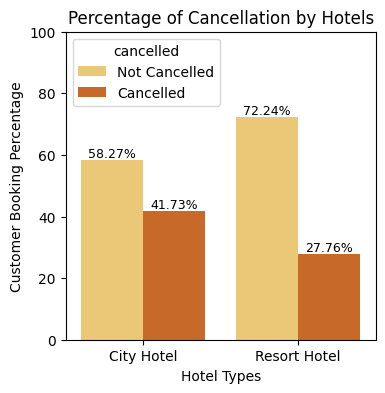

In [512]:
plt.figure(figsize=(4,4))
ax=sns.barplot(data=hotel_cancellation,x='hotel', y='percentage', hue='cancelled', palette='YlOrBr')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, labels=[f"{v.get_height():,.2f}%" for v in container])
ax.set_ylim(0, 100)
plt.xlabel("Hotel Types", fontsize=10)
plt.ylabel("Customer Booking Percentage", fontsize=10)
plt.title("Percentage of Cancellation by Hotels", fontsize=12)
plt.show()

From the above bar chart, we can observe Resort Hotel has more bookings and city hotel has more cancellations

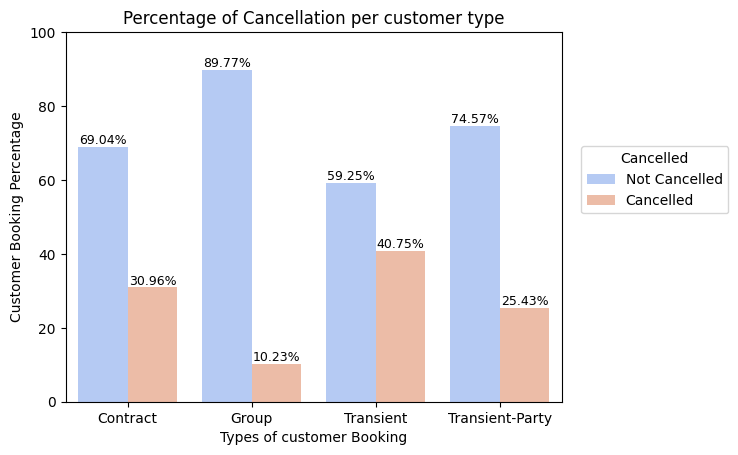

In [469]:
ax=sns.barplot(customer_cancellation, x='customer_type',y='percentage', hue='Cancelled', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, labels=[f"{v.get_height():,.2f}%" for v in container])
ax.set_ylim(0, 100)
sns.move_legend(ax, "right",bbox_to_anchor=(1.35,0.6))
plt.xlabel("Types of customer Booking", fontsize=10)
plt.ylabel("Customer Booking Percentage", fontsize=10)
plt.title("Percentage of Cancellation per customer type", fontsize=12)
plt.show()

From the above bar chart, we can observe Group type of customers has more booking and least cancellations and Transient Type of customers has the highest cancellations.

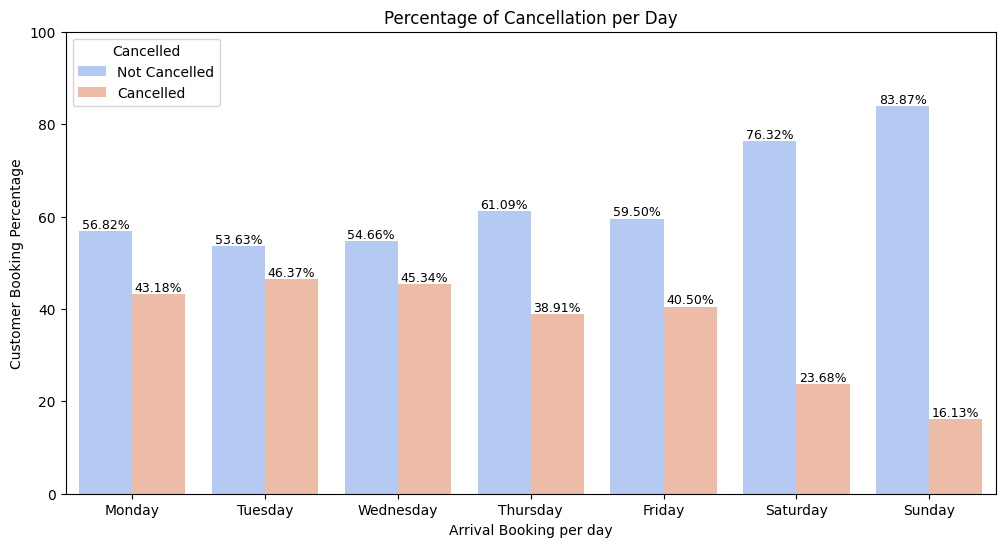

In [468]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=day_canceled, x='reservation_day', y='percentage', hue='Cancelled', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, labels=[f"{v.get_height():,.2f}%" for v in container])
ax.set_ylim(0, 100)
plt.xlabel("Arrival Booking per day", fontsize=10)
plt.ylabel("Customer Booking Percentage", fontsize=10)
plt.title("Percentage of Cancellation per Day", fontsize=12)
plt.show()

From the above bar chart, Sunday has the highest bookings with least cancellations. Whilst Tuesday has the highest Cancellations.

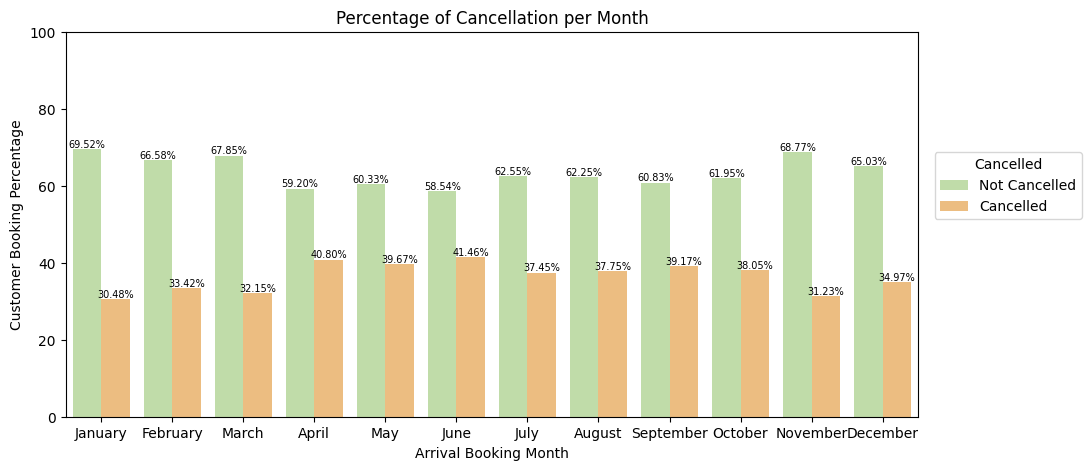

In [461]:
plt.figure(figsize=(11,5))
ax=sns.barplot(data=month_canceled, x='arrival_date_month', y='percentage', hue='Cancelled', palette='Spectral_r')
for container in ax.containers:
    ax.bar_label(container, fontsize=7, labels=[f"{v.get_height():,.2f}%" for v in container])
ax.set_ylim(0, 100)
sns.move_legend(ax, "right",bbox_to_anchor=(1.20,0.6))
plt.xlabel("Arrival Booking Month", fontsize=10)
plt.ylabel("Customer Booking Percentage", fontsize=10)
plt.title("Percentage of Cancellation per Month", fontsize=12)
plt.show()

From the above bar chart, we can observe June has the highest cancellations.

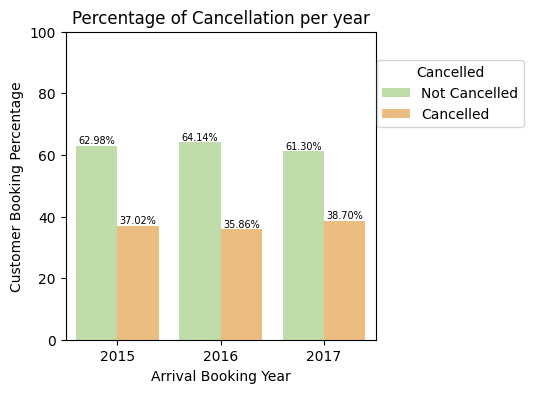

In [466]:
plt.figure(figsize=(4,4))
ax=sns.barplot(data=year_canceled, x='arrival_date_year', y='percentage', hue='Cancelled', palette='Spectral_r')
for container in ax.containers:
    ax.bar_label(container, fontsize=7, labels=[f"{v.get_height():,.2f}%" for v in container])
ax.set_ylim(0, 100)
sns.move_legend(ax, "right",bbox_to_anchor=(1.50,0.8))
plt.xlabel("Arrival Booking Year", fontsize=10)
plt.ylabel("Customer Booking Percentage", fontsize=10)
plt.title("Percentage of Cancellation per year", fontsize=12)
plt.show()

We can see 2016 has the highest booking, and 2017 has the highest cancellations.

In [514]:
fig=px.line(Resort_month_customers,x='arrival_date_month',y='customers')
fig.update_traces(
    line=dict(color='royalblue', width=4),
    marker=dict(symbol='circle', size=10, color='red', line=dict(color='white', width=2)),
    mode='lines+markers'
)
fig.update_layout(
    xaxis_title='Months',
    yaxis_title='Number of customers',
    title='Resort Hotel Booking over months',
    width=800,
    height=400,
    plot_bgcolor='lavender',
    paper_bgcolor='whitesmoke',
)

fig1=px.line(City_month_customers,x='arrival_date_month',y='customers')
fig1.update_traces(
    line=dict(color='royalblue', width=4),
    marker=dict(symbol='circle', size=10, color='red', line=dict(color='white', width=2)),
    mode='lines+markers'

)
fig1.update_layout(
    xaxis_title='Months',
    yaxis_title='Number of customers',
    title='City Hotel Booking over months',
    width=800,
    height=400,
    plot_bgcolor='lavender',
    paper_bgcolor='whitesmoke',
)
fig.show()
fig1.show()

Based upon the above line charts, we can observe resort hotel has most bookings in June and Least in January (customers who didn't cancelled).

we can observe city hotel has most bookings in August and Least in January (customers who didn't cancelled).

In [515]:
fig=px.line(Resort_actual_customers,x='reservation_day',y='customers')
fig.update_traces(
    line=dict(color='royalblue', width=4),
    marker=dict(symbol='circle', size=10, color='red', line=dict(color='white', width=2)),
    mode='lines+markers'

)
fig.update_layout(
    xaxis_title='Days',
    yaxis_title='Number of customers',
    title='Resort Hotel Booking over days',
    width=800,
    height=400,
    plot_bgcolor='lavender',
    paper_bgcolor='whitesmoke',
)

fig1=px.line(City_actual_customers,x='reservation_day',y='customers')
fig1.update_traces(
    line=dict(color='royalblue', width=4),
    marker=dict(symbol='circle', size=10, color='red', line=dict(color='white', width=2)),
    mode='lines+markers'

)
fig1.update_layout(
    xaxis_title='Days',
    yaxis_title='Number of customers',
    title='City Hotel Booking over days',
    width=800,
    height=400,
    plot_bgcolor='lavender',
    paper_bgcolor='whitesmoke',
)
fig.show()
fig1.show()


From the above line chart, we can observe Resort Hotel has most bookings in Sunday, followed by Thursday. Whereas, City Hotel has the most booking on Sunday followed by Friday (Customers who didn't cancelled).

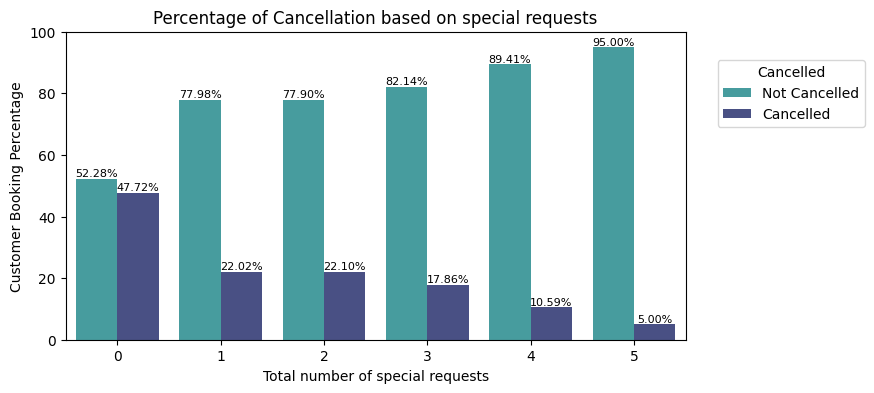

In [475]:
plt.figure(figsize=(8,4))
ax=sns.barplot(data=sp_requests_canceled, x='total_of_special_requests', y='percentage', hue='Cancelled', palette='mako_r')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, labels=[f"{v.get_height():,.2f}%" for v in container])
ax.set_ylim(0, 100)
sns.move_legend(ax, "right",bbox_to_anchor=(1.30,0.8))
plt.xlabel("Total number of special requests", fontsize=10)
plt.ylabel("Customer Booking Percentage", fontsize=10)
plt.title("Percentage of Cancellation based on special requests", fontsize=12)
plt.show()

From above visualisations, we can observe when the number of special requests increases the percentage of cancellations decreases.

In [283]:
fig = px.choropleth(Hotel_country,
                    locations="country",
                    color="Customers",
                    title="Customers from Different Countries",
                    range_color=(1,3000)
                    )
fig.update_geos(
    showcoastlines=True, coastlinecolor="LightGray",
    showland=True, landcolor="whitesmoke",
    showocean=True, oceancolor="aliceblue",
    showframe=False
)
fig.show()

From the above world map visualisations, we can see Europe has the Highest customers followed by US, Canada and then Asia.

# Machine Learning

Hotel Cancellation prediction

In [ ]:
set(df.assigned_room_type)

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'}

In [516]:
df2=pd.DataFrame()
df2

""


In [517]:
for i in df.columns:
  df2[i]=df[i].astype('category').cat.codes
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_day
0,1,0,342,0,6,26,0,0,0,2,...,0,0,0,2,1,0,0,1,121,2
1,1,0,478,0,6,26,0,0,0,2,...,0,0,0,2,1,0,0,1,121,2
2,1,0,7,0,6,26,0,0,1,1,...,0,0,0,2,2136,0,0,1,122,3
3,1,0,13,0,6,26,0,0,1,1,...,221,0,0,2,2136,0,0,1,122,3
4,1,0,14,0,6,26,0,0,2,2,...,174,0,0,2,3535,0,1,1,123,4


In [536]:
X=df2.drop(['is_canceled'],axis=1)
y=df2.is_canceled

Now, we will do feature selection to understand which feature has more weight in model predictions.

In [537]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)
print(important_features)


reservation_status                0.714187
deposit_type                      0.056846
country                           0.037827
lead_time                         0.029974
total_of_special_requests         0.022069
reservation_status_date           0.019420
previous_cancellations            0.017808
market_segment                    0.015475
reservation_day                   0.011112
required_car_parking_spaces       0.008739
customer_type                     0.007672
agent                             0.007375
adr                               0.006423
assigned_room_type                0.005459
booking_changes                   0.005332
stays_in_week_nights              0.004752
stays_in_weekend_nights           0.004222
arrival_date_week_number          0.003688
distribution_channel              0.003583
arrival_date_year                 0.003554
arrival_date_month                0.002370
arrival_date_day_of_month         0.002293
hotel                             0.002139
previous_bo

As we can observe reservation_status has over 70% correlation, which will bias the result and there will be a data leak in our model giving us false over 90% accuracy. Hence we will drop this column for our model prediction.

In [539]:
X=df2.drop(['is_canceled','reservation_status'],axis=1)
y=df2.is_canceled

We will split the dataset into train and test data for out data model. Our split size will be 70:30, which means 70% training data and 30% testing data.

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [563]:
model = RandomForestClassifier(max_depth=32,n_estimators=24, random_state=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, n_estimators=24, random_state=3)

In [564]:
y_pred = model.predict(X_test)

In [565]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9481


Our model is able to predict the cancellation of a hotel booking with 94.8% accuracy rate.

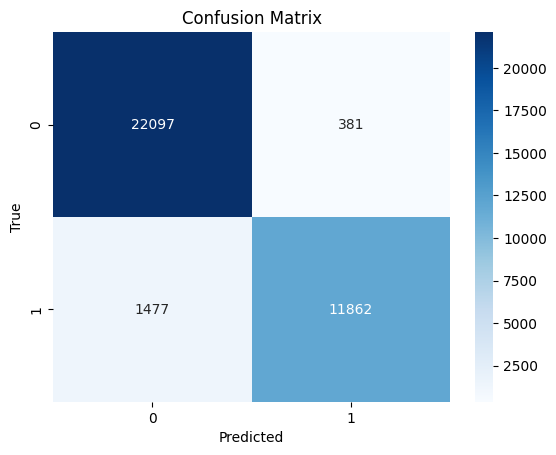

In [566]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Above is the confusion matrix, which states 1477 records were False Positive and 381 were True Negative.

In [567]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.94448101 0.94005384 0.94478014 0.94304176 0.9393323 ]
Mean CV score: 0.9423


We have performed cross-validation score to get the mean cross validation score. This will ensure the model is not overfitting and model performs better with unseen data.

In [568]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


df = df.dropna()
label_encoder = LabelEncoder()

X = df2.drop(["is_canceled","reservation_status"], axis=1)
y = df2["is_canceled"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.873398107044141
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14907
           1       0.85      0.80      0.83      8971

    accuracy                           0.87     23878
   macro avg       0.87      0.86      0.86     23878
weighted avg       0.87      0.87      0.87     23878



Now we have used the KNeighborsClassifier to predict the hotel booking cancellation with 87.3% accuracy.

Now, we will utilise the Neural network to predict the hotel booking cancellation.

In [572]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy = (y_pred.flatten() == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7996 - loss: 0.4209 - val_accuracy: 0.9157 - val_loss: 0.2083
Epoch 2/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9201 - loss: 0.2074 - val_accuracy: 0.9488 - val_loss: 0.1445
Epoch 3/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9452 - loss: 0.1521 - val_accuracy: 0.9572 - val_loss: 0.1171
Epoch 4/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9577 - loss: 0.1222 - val_accuracy: 0.9692 - val_loss: 0.0956
Epoch 5/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9631 - loss: 0.1092 - val_accuracy: 0.9702 - val_loss: 0.0882
Epoch 6/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9652 - loss: 0.0985 - val_accuracy: 0.9714 - val_loss: 0.0830
Epoch 7/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9693 - loss: 0.0904 - val_accuracy: 0.9736 - val_loss: 0.0804
Epoch 8/20
2612/2612 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9709 - loss: 0.

Our Neural Network Model is able to successfully predict the hotel booking cancellation with 96.3% accuracy.

# Conclusion

From the above data analysis of hotel booking data of customers from 178 countries, we can conclude the following:

1.  Most of the customers are from Europe followed by US, Canada and then Asia.
2. City Hotel has more bookings, whereas Resort Hotel has the least cancellations.
3. Sunday has the highest number of bookings followed by Thursday and Friday.
4. There is a negative correlation between the total number of special requests and the cancellations. When the total number of special requests increase the probability of the cancellation decreases.
5. 2016 has the Highest number of bookings, followed by 2015.
6. June and August has the most hotel bookings, which indicates customers love to tranvel during those periods.
7. January and December has the least hotel bookings, which indicates how Holiday and seasonallity has an affect on the hotel bookings.
8.  Group type of customers has the heighest hotel booking, with least cancellation.